# Trimming the boundaries of categorization for EP permits by hand
Of course we can apply all sorts of 'quantiles' classification but the 'psychological' categorization by humans applying for the permit and issuing it is more important, because humans 'intuitively' categorize certain types of jobs in a certain price range, which makes the probability of finding _your_ particular kind in just one of these 'psychological bins'.

In [1]:
import sqlalchemy as sqlalc
import pandas as pd
import sorting
import matplotlib.pyplot as plt
import numpy

We take a table 'PERMIT - EASY PERMIT PROCESS' from the firstbase.sqlite and will be storing the results in secondbase.sqlite

In [2]:
conn_source = sqlalc.create_engine(sorting.TARGET_DATABASE_URI)
conn_target = sqlalc.create_engine(sorting.INTERM_DATABASE_URI)
    
permits = pd.read_sql_table(table_name='PERMIT - NEW CONSTRUCTION', con=conn_source)

Verify what we've ingested

In [7]:
permits.head(n=2)

,id,permit_,permit_type,review_type,application_start_date,issue_date,processing_time,street_number,street_direction,street_name,...,contact_13_type,contact_13_name,contact_13_city,contact_13_state,contact_13_zipcode,contact_14_type,contact_14_name,contact_14_city,contact_14_state,contact_14_zipcode
0,2965716,100776954,PERMIT - NEW CONSTRUCTION,DIRECT DEVELOPER SERVICES,2018-11-13,2019-01-02,50.0,1375,W,FULTON,...,None,None,None,None,None,None,None,None,None,None
1,2967780,100778223,PERMIT - NEW CONSTRUCTION,DIRECT DEVELOPER SERVICES,2018-12-26,2019-01-02,7.0,1220,W,JACKSON,...,None,None,None,None,None,None,None,None,None,None


The task is: to figure out the costs/numbers of the boundaries between 'normal' permits, 'large' permits (marked 'L'), 'extra large' (marked 'XL') and 'super large' (marked as 'XXL'). The simplest way to do it is by plotting and changing the parameters.

One column will be enough for this analysis.

In [8]:
reported_costs = permits.loc[:, ['reported_cost']]
mper = {'reported_cost': 'permits'}
reported_costs = reported_costs.rename(mapper=mper, axis='columns')
reported_costs.count(axis='index')

permits    1632
dtype: int64

In [9]:
L_and_more_removed = reported_costs[reported_costs['permits'] < 50000]
L_and_more_removed.count()

permits    552
dtype: int64

In [17]:
# prepare to plot
font_d = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16}

Text(0.5, 1.0, 'Number of permits')

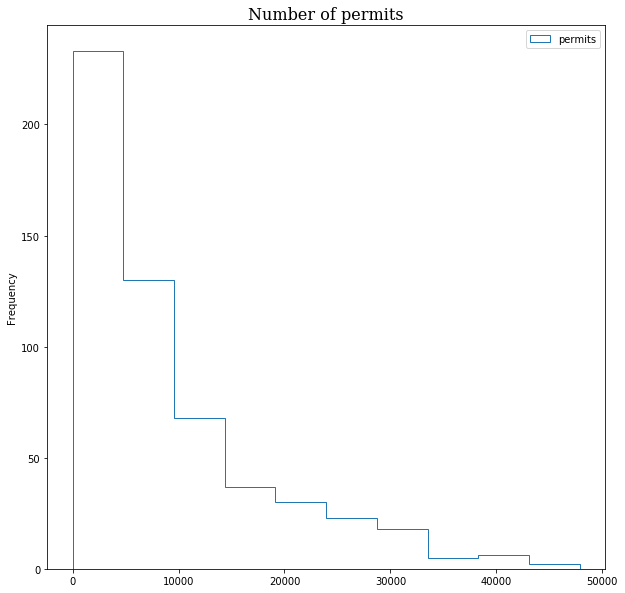

In [20]:
fig_1 = L_and_more_removed.plot.hist(bins=10, histtype='step', figsize=(10, 10))
fig_1.set_title('Number of permits', fontdict=font_d)

In [11]:
L_without_XL_and_more = reported_costs[(reported_costs['permits'] >= 50000) & (reported_costs['permits'] < 500000)]
L_without_XL_and_more.count()

permits    604
dtype: int64

Text(0.5, 1.0, "Number of 'L' permits")

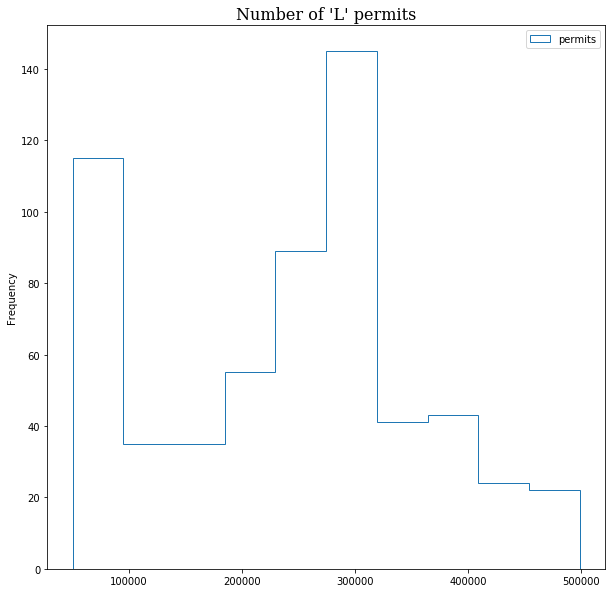

In [21]:
fig_2 = L_without_XL_and_more.plot.hist(bins=10, histtype='step', figsize=(10, 10))
fig_2.set_title("Number of 'L' permits", fontdict=font_d)

Here you can see the 'psychological' spike between $50k and $100k that is what in the mind of ordinary people constitutes a 'New Construction'. :)

Next - the XL range.

In [13]:
XL_without_XXL = reported_costs[(reported_costs['permits'] >= 500000) & (reported_costs['permits'] < 5000000)]
XL_without_XXL.count()

permits    384
dtype: int64

Text(0.5, 1.0, "Number of 'XL' permits")

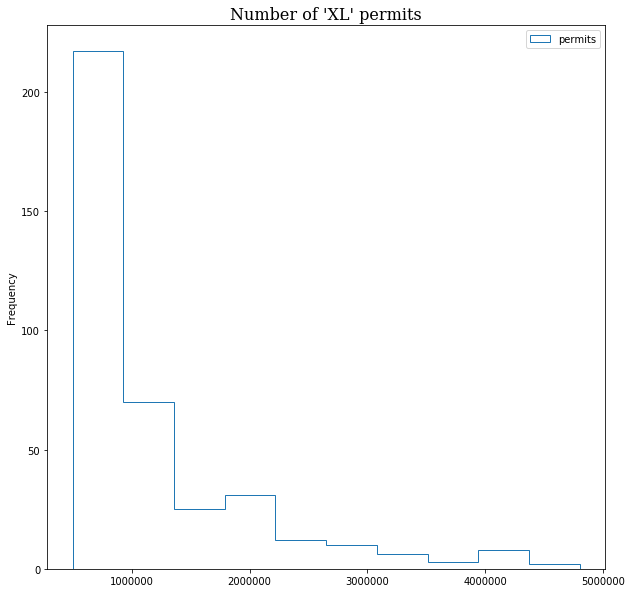

In [22]:
fig_3 = XL_without_XXL.plot.hist(bins=10, histtype='step', figsize=(10, 10))
fig_3.set_title("Number of 'XL' permits", fontdict=font_d)

Again, it is very visible that $500k is the 'psychological boundary' between L and XL.

In [15]:
XXL = reported_costs[(reported_costs['permits'] >= 5000000) & (reported_costs['permits'] < 500000000)]
XXL.count()

permits    92
dtype: int64

Text(0.5, 1.0, "Number of 'XXL' permits")

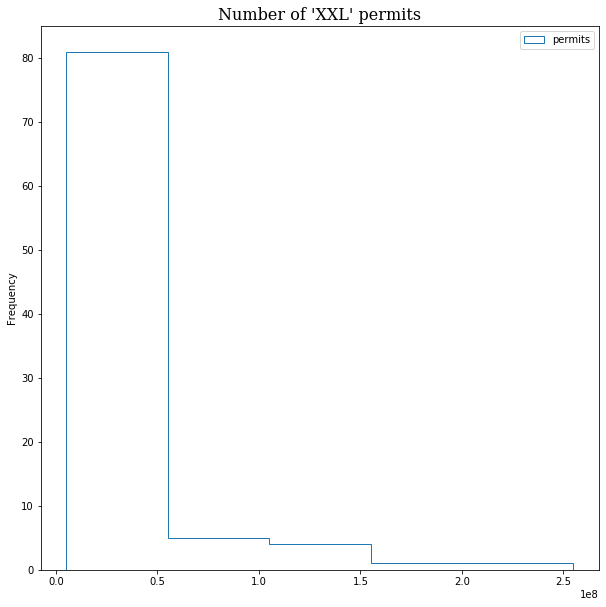

In [23]:
fig_4 = XXL.plot.hist(bins=5, histtype='step', figsize=(10, 10))
fig_4.set_title("Number of 'XXL' permits", fontdict=font_d)

These are, obviously, very rare events (in this category) already.

Fin